## Exploratory Data Analysis (EDA)
## Objective
__To analyze employee performance across departments, understand patterns in the data,
and identify key factors influencing employee performance.__

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_eda = pd.read_csv('data/processed/eda_employee_data.csv')
df_eda.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


In [3]:
df_eda.shape

(1200, 28)

In [4]:
df_eda.columns

Index(['EmpNumber', 'Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'],
      dtype='object')

## Employee Performance Across Departments

In [5]:
df_eda['EmpDepartment'].unique()

array(['Sales', 'Human Resources', 'Development', 'Data Science',
       'Research & Development', 'Finance'], dtype=object)

In [6]:
df_eda['EmpDepartment'].value_counts()

EmpDepartment
Sales                     373
Development               361
Research & Development    343
Human Resources            54
Finance                    49
Data Science               20
Name: count, dtype: int64

In [ ]:
# Average performance by department

In [7]:
dept_perf = df_eda.groupby('EmpDepartment')['PerformanceRating'].mean().sort_values(ascending=False)
dept_perf

EmpDepartment
Development               3.085873
Data Science              3.050000
Human Resources           2.925926
Research & Development    2.921283
Sales                     2.860590
Finance                   2.775510
Name: PerformanceRating, dtype: float64

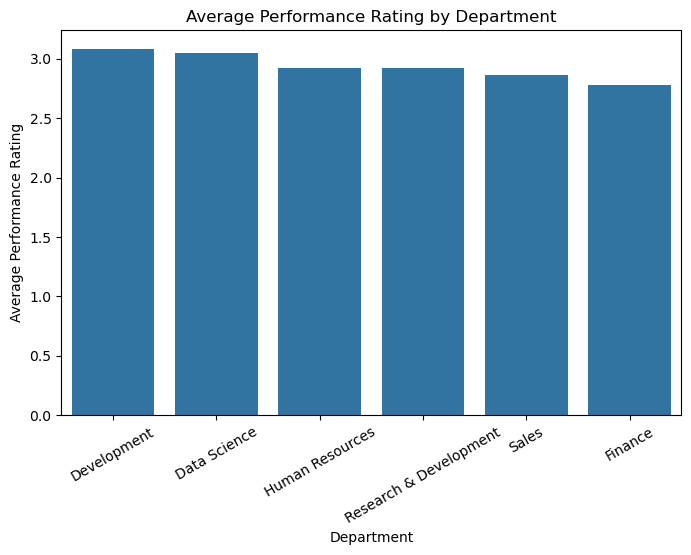

In [8]:
plt.figure(figsize=(8,5))
sns.barplot(x=dept_perf.index, y=dept_perf.values)
plt.title('Average Performance Rating by Department')
plt.ylabel('Average Performance Rating')
plt.xlabel('Department')
plt.xticks(rotation=30)
plt.show()

__Insight for Average Performance__

__Best performing departments__

Development and Data Science show the highest average performance ratings.

This indicates strong skill alignment, technical competency, and effective role utilization in these departments.

These departments can be considered benchmarks for best practices.

__Mid-range performance__

Human Resources and Research & Development show moderate performance levels.

Performance is stable but slightly lower than core technical teams.

Targeted interventions (training, role clarity, engagement initiatives) could further improve outcomes.

__Lower performing departments__

Sales and Finance show the lowest average performance ratings among all departments.

This may be due to:

High pressure targets (Sales)

Process-driven and repetitive work (Finance)

These departments may require performance support programs and motivational incentives.

__Overall pattern__

Technical and development-oriented departments tend to outperform support and revenue-pressure departments.

This suggests that performance evaluation metrics may favor structured and skill-based roles over high-variability roles.

__Caution on interpretation__

Some departments (like Data Science and Finance) have smaller employee counts, so their average performance should be interpreted with caution.

Further analysis using additional factors is recommended before taking policy decisions

## Impact of Environment Satisfaction on Performance

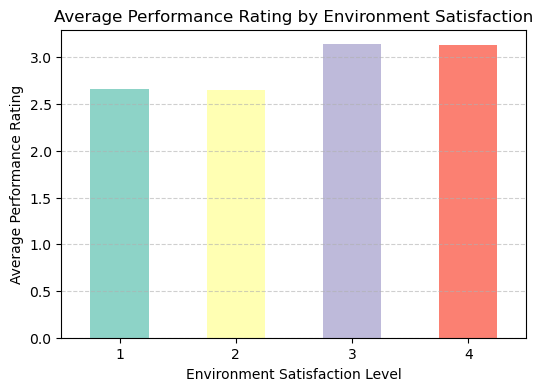

In [14]:
env_perf = (
    df_eda
    .groupby('EmpEnvironmentSatisfaction')['PerformanceRating']
    .mean()
)

plt.figure(figsize=(6,4))
env_perf.plot(
    kind='bar',
    color=['#8dd3c7', '#ffffb3', '#bebada', '#fb8072']
)

plt.title('Average Performance Rating by Environment Satisfaction')
plt.xlabel('Environment Satisfaction Level')
plt.ylabel('Average Performance Rating')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

__Insight for Performance Rating VS Environment Satisfaction__

Average performance rating increases with higher environment satisfaction levels, indicating that a positive and supportive work environment strongly contributes to improved employee performance.

## Impact of Salary Hike on Performance

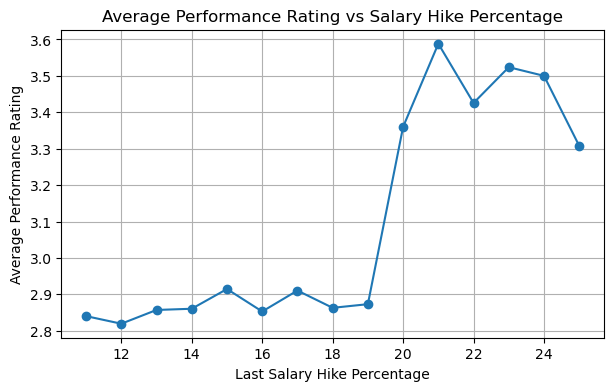

In [11]:
salary_perf = (
    df_eda
    .groupby('EmpLastSalaryHikePercent')['PerformanceRating']
    .mean()
)

plt.figure(figsize=(7,4))
salary_perf.plot(marker='o')
plt.title('Average Performance Rating vs Salary Hike Percentage')
plt.xlabel('Last Salary Hike Percentage')
plt.ylabel('Average Performance Rating')
plt.grid(True)
plt.show()

__Insight for Salary Hike vs Performance__

Average performance rating increases noticeably after a salary hike of around 20%, indicating that higher salary increments are strongly associated with improved employee performance. This suggests that performance-linked compensation acts as an effective motivational factor.

## Impact of Work-Life Balance on Performance

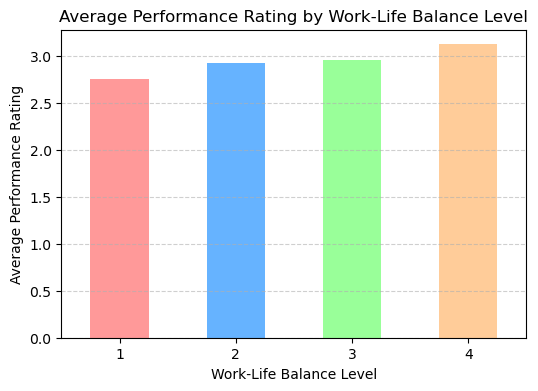

In [13]:
wlb_perf = (
    df_eda
    .groupby('EmpWorkLifeBalance')['PerformanceRating']
    .mean()
)

plt.figure(figsize=(6,4))
wlb_perf.plot(
    kind='bar',
    color=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']
)

plt.title('Average Performance Rating by Work-Life Balance Level')
plt.xlabel('Work-Life Balance Level')
plt.ylabel('Average Performance Rating')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

__Insight for Average Performance Rating by Work-Life Balance Level__

Average performance rating increases with better work-life balance levels, indicating that employees who maintain a healthy balance between work and personal life tend to perform better